<center><h1> Project - Statistical Machine Learning </h1></center>
<center><h3> Anand Prakash Saini </h3></center>

### Objective:

#### Train simple multi-layer perceptrons (MLPs) with Pytorch to classify the MNIST dataset. The focus on regularization and over-/under-fitting issues.

In [1]:
import project_mnist_utils as utils
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Visualizing the Dataset:

In [2]:
train_data, train_targets, test_data, test_targets = utils.load_data()
print("Shape of train data: ", train_data.shape, "and targets: ", train_targets.shape)
print("Shape of test data: ", test_data.shape, "and targets: ", test_targets.shape)

Shape of train data:  torch.Size([60000, 784]) and targets:  torch.Size([60000, 10])
Shape of test data:  torch.Size([10000, 784]) and targets:  torch.Size([10000, 10])


Visualizing the first image in the dataset with target.


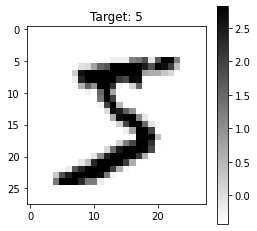

In [3]:
print("Visualizing the first image in the dataset with target.")
plt.figure(figsize=(4, 4))
plt.title(f"Target: {train_targets[0].argmax()}")
plt.imshow(train_data[0].view(28, 28), cmap="binary")
plt.colorbar()
plt.show()

### Models:

Different Models that we are working with in this project:

> 1. **Linear Model:** A Linear model with no hidden layers. It's essentially a logistic regression model for MNIST digit classification.


> 2. **Shallow Model:** The Shallow Model introduces non-linearity and one hidden layer into the architecture. It is composed of two linear layers separated by a ReLU (Rectified Linear Unit) activation function.


> 3. **Deep Model:** The Deep Model further increases the complexity by adding an additional hidden layer. This model consists of three linear layers with two ReLU activation functions in between.

In [4]:
no_reg_model = utils.get_linear_model(784, 10)
high_reg_model = utils.get_linear_model(784, 10)
dropout_model = utils.deep_dropout_model(dropout_rate=0.5)

#### Train a two linear models, one with no L2 regularisation (lambda_l2 = 0), the other with high L2 regularisation (for instance, lambda_l2 = 1). 

In [5]:
no_reg_trained_model, no_reg_lin_test_losses, no_reg_lin_train_accuracies, no_reg_lin_test_losses, no_reg_lin_test_accuracies = utils.train_model(no_reg_model)
high_reg_trained_model, high_reg_lin_test_losses, high_reg_lin_train_accuracies, high_reg_lin_test_losses, high_reg_lin_test_accuracies  = utils.train_model(high_reg_model, lambda_l2=1)
dp_trained_model, _, _, _, _ = utils.train_model(dropout_model)

Epoch 1/50 - Train loss: 0.0037, Train accuracy: 0.8914, Test loss: 0.0034, Test accuracy: 0.8978
Epoch 2/50 - Train loss: 0.0031, Train accuracy: 0.9137, Test loss: 0.0033, Test accuracy: 0.9023
Epoch 3/50 - Train loss: 0.0029, Train accuracy: 0.9179, Test loss: 0.0033, Test accuracy: 0.9052
Epoch 4/50 - Train loss: 0.0029, Train accuracy: 0.9197, Test loss: 0.0033, Test accuracy: 0.9066
Epoch 5/50 - Train loss: 0.0028, Train accuracy: 0.9204, Test loss: 0.0032, Test accuracy: 0.9080
Epoch 6/50 - Train loss: 0.0028, Train accuracy: 0.9218, Test loss: 0.0032, Test accuracy: 0.9081
Epoch 7/50 - Train loss: 0.0028, Train accuracy: 0.9228, Test loss: 0.0032, Test accuracy: 0.9083
Epoch 8/50 - Train loss: 0.0027, Train accuracy: 0.9234, Test loss: 0.0032, Test accuracy: 0.9088
Epoch 9/50 - Train loss: 0.0027, Train accuracy: 0.9242, Test loss: 0.0032, Test accuracy: 0.9085
Epoch 10/50 - Train loss: 0.0027, Train accuracy: 0.9247, Test loss: 0.0032, Test accuracy: 0.9088
Epoch 11/50 - Train

Epoch 34/50 - Train loss: 0.0207, Train accuracy: 0.5964, Test loss: 0.0127, Test accuracy: 0.5596
Epoch 35/50 - Train loss: 0.0207, Train accuracy: 0.5942, Test loss: 0.0136, Test accuracy: 0.5330
Epoch 36/50 - Train loss: 0.0207, Train accuracy: 0.5934, Test loss: 0.0127, Test accuracy: 0.5744
Epoch 37/50 - Train loss: 0.0206, Train accuracy: 0.5972, Test loss: 0.0130, Test accuracy: 0.5451
Epoch 38/50 - Train loss: 0.0207, Train accuracy: 0.5946, Test loss: 0.0128, Test accuracy: 0.5709
Epoch 39/50 - Train loss: 0.0206, Train accuracy: 0.5980, Test loss: 0.0127, Test accuracy: 0.5720
Epoch 40/50 - Train loss: 0.0206, Train accuracy: 0.5953, Test loss: 0.0130, Test accuracy: 0.5451
Epoch 41/50 - Train loss: 0.0205, Train accuracy: 0.5992, Test loss: 0.0128, Test accuracy: 0.5712
Epoch 42/50 - Train loss: 0.0207, Train accuracy: 0.5955, Test loss: 0.0138, Test accuracy: 0.5182
Epoch 43/50 - Train loss: 0.0206, Train accuracy: 0.5955, Test loss: 0.0126, Test accuracy: 0.5720
Epoch 44/5

Weights without Regularization:


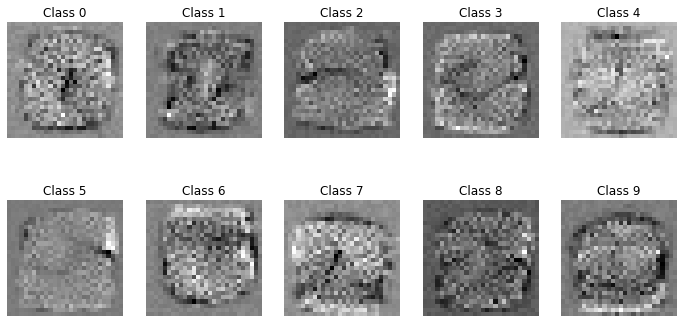

Weights with High Regularization:


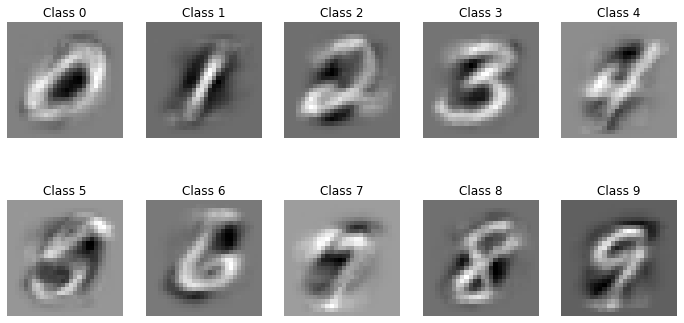

Weights with Dropout Regularization:


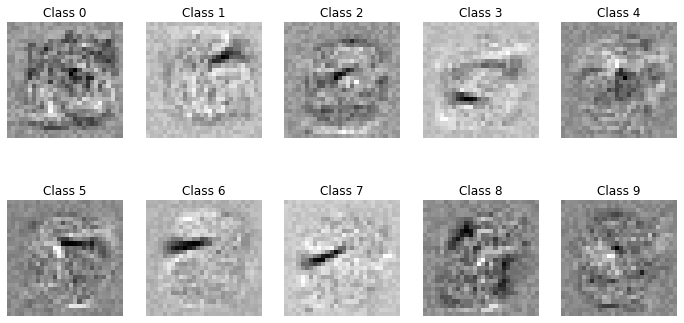

In [6]:
print("Weights without Regularization:")
utils.visualize_weights(no_reg_trained_model)
print("Weights with High Regularization:")
utils.visualize_weights(high_reg_trained_model)
print("Weights with Dropout Regularization:")
utils.visualize_weights(dp_trained_model)

L2 regularization penalizes weights with large magnitudes. These 'weight images' are very smooth and the digits are clear. Though the model has a better representation of how each digit appears, the test accuracy is low because messy/unusual examples don't fit the template well (overfitting).

#### For dropout:

Dropout is a regularization technique that randomly sets a fraction of the input units to 0 at each update during training time, which helps prevent overfitting.

- Dropout encourages the network to develop a more redundant representation to ensure robustness, as it cannot rely on any single set of features. This leads to a distribution of weights where the network learns to represent features in multiple ways across different neurons.

- Less Co-adaptation of Neurons: Unlike L2 regularization, which smoothens the weights, dropout reduces co-adaptation among neurons. This means that the network's neurons are discouraged from interacting in highly interdependent ways, leading to a more diversified set of weights.

### Model Training

In [7]:
linear_model = utils.get_linear_model(784, 10)
shallow_model = utils.get_shallow_model(50)
deep_model = utils.get_deep_model(784, 392, 196, 10)

In [8]:
# Train models and record test losses
trained_linear_model, lin_train_loss, lin_train_acc, lin_test_loss, lin_test_accu  = utils.train_model(linear_model)
trained_shallow_model, shallow_train_loss, shallow_train_acc, shallow_test_loss, shallow_test_accu  = utils.train_model(shallow_model)
trained_deep_model, deep_train_loss, deep_train_acc, deep_test_loss, deep_test_accu  = utils.train_model(deep_model)

Epoch 1/50 - Train loss: 0.0037, Train accuracy: 0.8918, Test loss: 0.0034, Test accuracy: 0.8975
Epoch 2/50 - Train loss: 0.0031, Train accuracy: 0.9137, Test loss: 0.0033, Test accuracy: 0.9033
Epoch 3/50 - Train loss: 0.0029, Train accuracy: 0.9178, Test loss: 0.0033, Test accuracy: 0.9046
Epoch 4/50 - Train loss: 0.0029, Train accuracy: 0.9201, Test loss: 0.0033, Test accuracy: 0.9058
Epoch 5/50 - Train loss: 0.0028, Train accuracy: 0.9209, Test loss: 0.0032, Test accuracy: 0.9068
Epoch 6/50 - Train loss: 0.0028, Train accuracy: 0.9218, Test loss: 0.0032, Test accuracy: 0.9078
Epoch 7/50 - Train loss: 0.0028, Train accuracy: 0.9225, Test loss: 0.0032, Test accuracy: 0.9076
Epoch 8/50 - Train loss: 0.0027, Train accuracy: 0.9235, Test loss: 0.0032, Test accuracy: 0.9081
Epoch 9/50 - Train loss: 0.0027, Train accuracy: 0.9241, Test loss: 0.0032, Test accuracy: 0.9078
Epoch 10/50 - Train loss: 0.0027, Train accuracy: 0.9247, Test loss: 0.0032, Test accuracy: 0.9080
Epoch 11/50 - Train

Epoch 34/50 - Train loss: 0.0001, Train accuracy: 0.9998, Test loss: 0.0011, Test accuracy: 0.9745
Epoch 35/50 - Train loss: 0.0001, Train accuracy: 0.9998, Test loss: 0.0011, Test accuracy: 0.9742
Epoch 36/50 - Train loss: 0.0000, Train accuracy: 0.9998, Test loss: 0.0011, Test accuracy: 0.9741
Epoch 37/50 - Train loss: 0.0000, Train accuracy: 0.9999, Test loss: 0.0011, Test accuracy: 0.9741
Epoch 38/50 - Train loss: 0.0000, Train accuracy: 0.9999, Test loss: 0.0011, Test accuracy: 0.9745
Epoch 39/50 - Train loss: 0.0000, Train accuracy: 0.9999, Test loss: 0.0011, Test accuracy: 0.9748
Epoch 40/50 - Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0011, Test accuracy: 0.9749
Epoch 41/50 - Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0011, Test accuracy: 0.9748
Epoch 42/50 - Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0011, Test accuracy: 0.9750
Epoch 43/50 - Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0011, Test accuracy: 0.9751
Epoch 44/5

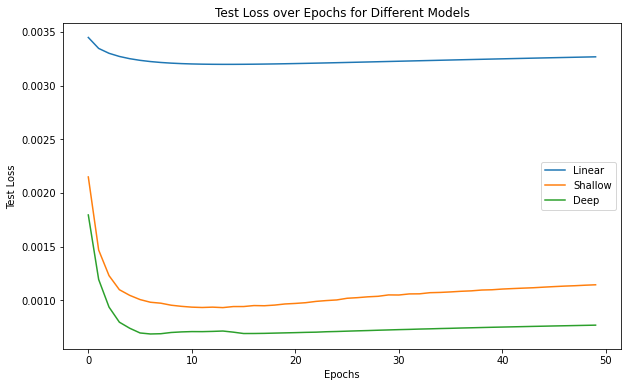

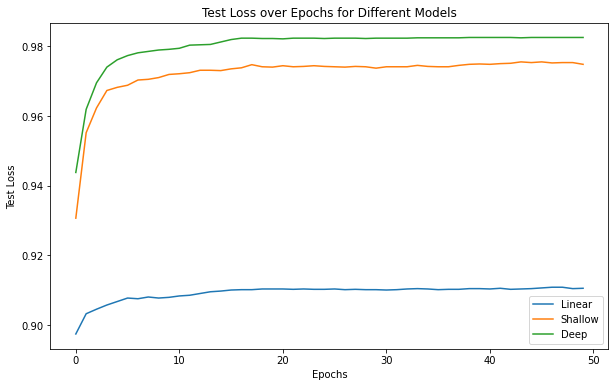

In [10]:
# Plot losses
model_losses = {'Linear': lin_test_loss, 'Shallow': shallow_test_loss, 'Deep': deep_test_loss}
utils.plot_losses(model_losses)
# Plot Accuracies
model_accuracies = {'Linear': lin_test_accu, 'Shallow': shallow_test_accu, 'Deep': deep_test_accu}
utils.plot_losses(model_accuracies)

**Deep model with 2 hidden layers performances the best. We continue with this Deep model.**

#### Confusion Matrix on testing Dataset with Deep Model

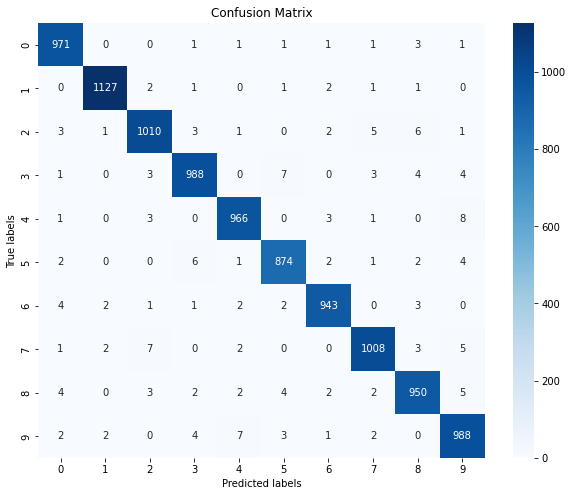

In [11]:
test_labels, pred_labels, accuracy = utils.get_prediction(trained_deep_model, test_data, test_targets)
conf_matrix = utils.confusion_matrix(test_labels, pred_labels, 10)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
l2_values = [0, 0.001, 0.01, 0.1, 1]
test_losses = []
test_accuracies = []

Epoch 1/50 - Train loss: 0.0034, Train accuracy: 0.9018, Test loss: 0.0017, Test accuracy: 0.9468
Epoch 2/50 - Train loss: 0.0013, Train accuracy: 0.9633, Test loss: 0.0011, Test accuracy: 0.9652
Epoch 3/50 - Train loss: 0.0008, Train accuracy: 0.9761, Test loss: 0.0009, Test accuracy: 0.9709
Epoch 4/50 - Train loss: 0.0006, Train accuracy: 0.9829, Test loss: 0.0008, Test accuracy: 0.9756
Epoch 5/50 - Train loss: 0.0004, Train accuracy: 0.9882, Test loss: 0.0007, Test accuracy: 0.9776
Epoch 6/50 - Train loss: 0.0003, Train accuracy: 0.9923, Test loss: 0.0007, Test accuracy: 0.9791
Epoch 7/50 - Train loss: 0.0002, Train accuracy: 0.9948, Test loss: 0.0007, Test accuracy: 0.9801
Epoch 8/50 - Train loss: 0.0002, Train accuracy: 0.9968, Test loss: 0.0007, Test accuracy: 0.9802
Epoch 9/50 - Train loss: 0.0001, Train accuracy: 0.9984, Test loss: 0.0007, Test accuracy: 0.9796
Epoch 10/50 - Train loss: 0.0001, Train accuracy: 0.9990, Test loss: 0.0007, Test accuracy: 0.9794
Epoch 11/50 - Train

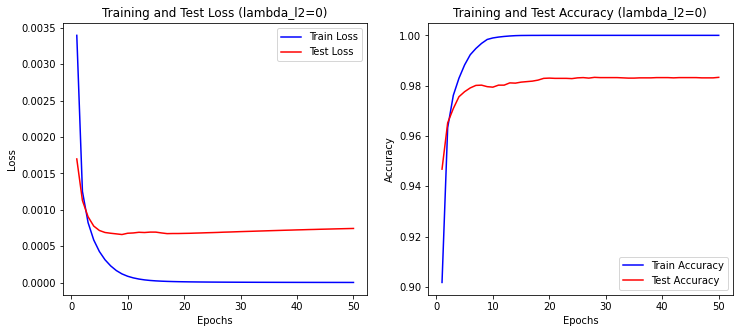

Epoch 1/50 - Train loss: 0.0054, Train accuracy: 0.9014, Test loss: 0.0018, Test accuracy: 0.9436
Epoch 2/50 - Train loss: 0.0032, Train accuracy: 0.9603, Test loss: 0.0012, Test accuracy: 0.9607
Epoch 3/50 - Train loss: 0.0026, Train accuracy: 0.9723, Test loss: 0.0010, Test accuracy: 0.9683
Epoch 4/50 - Train loss: 0.0023, Train accuracy: 0.9788, Test loss: 0.0009, Test accuracy: 0.9720
Epoch 5/50 - Train loss: 0.0020, Train accuracy: 0.9828, Test loss: 0.0008, Test accuracy: 0.9734
Epoch 6/50 - Train loss: 0.0018, Train accuracy: 0.9854, Test loss: 0.0008, Test accuracy: 0.9748
Epoch 7/50 - Train loss: 0.0017, Train accuracy: 0.9871, Test loss: 0.0008, Test accuracy: 0.9751
Epoch 8/50 - Train loss: 0.0016, Train accuracy: 0.9889, Test loss: 0.0008, Test accuracy: 0.9757
Epoch 9/50 - Train loss: 0.0015, Train accuracy: 0.9901, Test loss: 0.0008, Test accuracy: 0.9758
Epoch 10/50 - Train loss: 0.0014, Train accuracy: 0.9913, Test loss: 0.0007, Test accuracy: 0.9762
Epoch 11/50 - Train

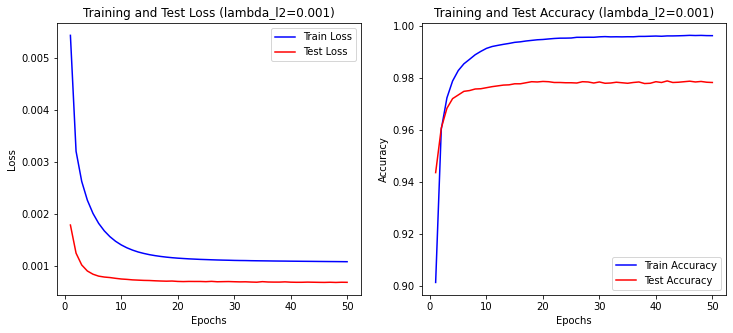

Epoch 1/50 - Train loss: 0.0137, Train accuracy: 0.8898, Test loss: 0.0028, Test accuracy: 0.9151
Epoch 2/50 - Train loss: 0.0059, Train accuracy: 0.9332, Test loss: 0.0026, Test accuracy: 0.9242
Epoch 3/50 - Train loss: 0.0052, Train accuracy: 0.9402, Test loss: 0.0025, Test accuracy: 0.9286
Epoch 4/50 - Train loss: 0.0051, Train accuracy: 0.9432, Test loss: 0.0024, Test accuracy: 0.9312
Epoch 5/50 - Train loss: 0.0050, Train accuracy: 0.9449, Test loss: 0.0024, Test accuracy: 0.9320
Epoch 6/50 - Train loss: 0.0050, Train accuracy: 0.9459, Test loss: 0.0023, Test accuracy: 0.9328
Epoch 7/50 - Train loss: 0.0050, Train accuracy: 0.9465, Test loss: 0.0023, Test accuracy: 0.9326
Epoch 8/50 - Train loss: 0.0050, Train accuracy: 0.9471, Test loss: 0.0023, Test accuracy: 0.9334
Epoch 9/50 - Train loss: 0.0050, Train accuracy: 0.9474, Test loss: 0.0023, Test accuracy: 0.9340
Epoch 10/50 - Train loss: 0.0050, Train accuracy: 0.9477, Test loss: 0.0023, Test accuracy: 0.9337
Epoch 11/50 - Train

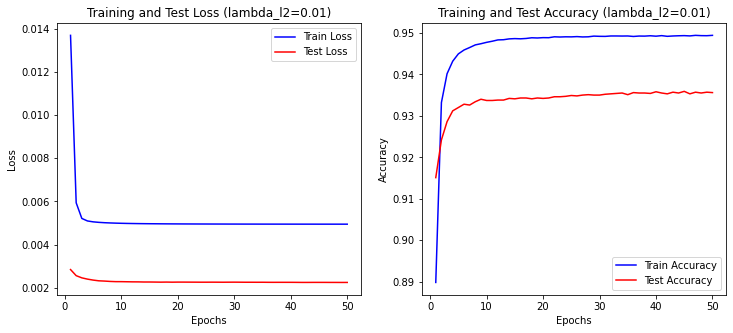

Epoch 1/50 - Train loss: 0.0263, Train accuracy: 0.7589, Test loss: 0.0086, Test accuracy: 0.7884
Epoch 2/50 - Train loss: 0.0175, Train accuracy: 0.7744, Test loss: 0.0085, Test accuracy: 0.7901
Epoch 3/50 - Train loss: 0.0175, Train accuracy: 0.7763, Test loss: 0.0085, Test accuracy: 0.7907
Epoch 4/50 - Train loss: 0.0174, Train accuracy: 0.7772, Test loss: 0.0085, Test accuracy: 0.7909
Epoch 5/50 - Train loss: 0.0174, Train accuracy: 0.7781, Test loss: 0.0085, Test accuracy: 0.7907
Epoch 6/50 - Train loss: 0.0174, Train accuracy: 0.7779, Test loss: 0.0085, Test accuracy: 0.7908
Epoch 7/50 - Train loss: 0.0174, Train accuracy: 0.7779, Test loss: 0.0085, Test accuracy: 0.7911
Epoch 8/50 - Train loss: 0.0174, Train accuracy: 0.7781, Test loss: 0.0085, Test accuracy: 0.7911
Epoch 9/50 - Train loss: 0.0174, Train accuracy: 0.7782, Test loss: 0.0085, Test accuracy: 0.7906
Epoch 10/50 - Train loss: 0.0174, Train accuracy: 0.7781, Test loss: 0.0085, Test accuracy: 0.7907
Epoch 11/50 - Train

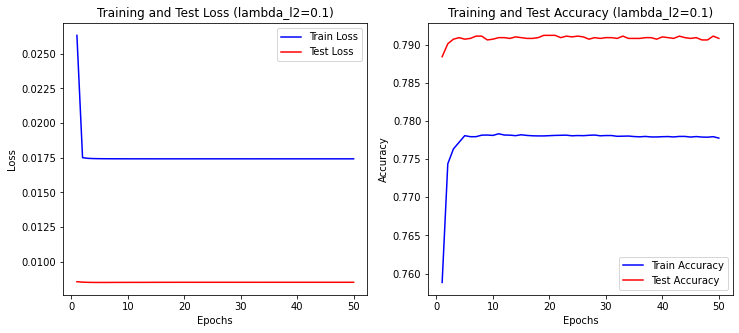

Epoch 1/50 - Train loss: 0.0323, Train accuracy: 0.1047, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 2/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 3/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 4/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 5/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 6/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 7/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 8/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 9/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 10/50 - Train loss: 0.0230, Train accuracy: 0.1027, Test loss: 0.0230, Test accuracy: 0.0958
Epoch 11/50 - Train

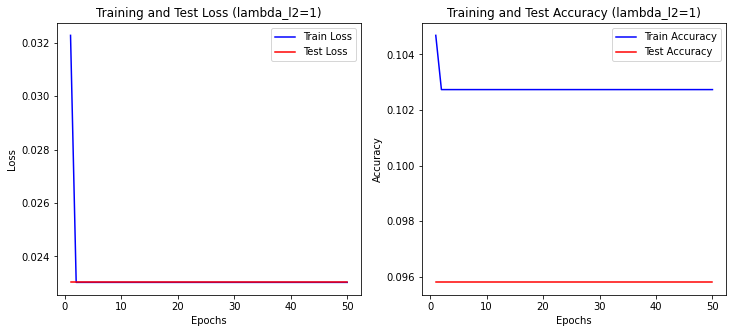

In [13]:
# Define a range of lambda_l2 values
lambda_l2_values = [0, 0.001, 0.01, 0.1, 1]

# Training and evaluating the model for each lambda_l2 value
for lambda_l2 in lambda_l2_values:
    model = utils.get_deep_model(784, 392, 196, 10)

    # Train the model using the current lambda_l2 value
    trained_model, train_losses, train_accuracies, test_losses, test_accuracies = utils.train_model(
        model=model, 
        nb_epochs=50,
        lambda_l2=lambda_l2
    )

    train_losses = [loss.detach().numpy() if torch.is_tensor(loss) else loss for loss in train_losses]
    test_losses = [loss.detach().numpy() if torch.is_tensor(loss) else loss for loss in test_losses]
    train_accuracies = [accu.detach().numpy() if torch.is_tensor(accu) else accu for accu in train_accuracies]
    test_accuracies = [accu.detach().numpy() if torch.is_tensor(accu) else accu for accu in test_accuracies]

    # Plotting
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    
    # Plot training and test losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, test_losses, 'r-', label='Test Loss')
    plt.title(f'Training and Test Loss (lambda_l2={lambda_l2})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and test accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
    plt.plot(epochs, test_accuracies, 'r-', label='Test Accuracy')
    plt.title(f'Training and Test Accuracy (lambda_l2={lambda_l2})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


### Dropout:

In [14]:
dropout_model = utils.deep_dropout_model(dropout_rate=0.5)
dp_trained_model, dp_train_losses, dp_train_accuracies, dp_test_losses, dp_test_accuracies = utils.train_model(dropout_model)

Epoch 1/50 - Train loss: 0.0064, Train accuracy: 0.8034, Test loss: 0.0024, Test accuracy: 0.9294
Epoch 2/50 - Train loss: 0.0034, Train accuracy: 0.9029, Test loss: 0.0017, Test accuracy: 0.9480
Epoch 3/50 - Train loss: 0.0029, Train accuracy: 0.9187, Test loss: 0.0015, Test accuracy: 0.9534
Epoch 4/50 - Train loss: 0.0026, Train accuracy: 0.9286, Test loss: 0.0013, Test accuracy: 0.9600
Epoch 5/50 - Train loss: 0.0023, Train accuracy: 0.9363, Test loss: 0.0012, Test accuracy: 0.9631
Epoch 6/50 - Train loss: 0.0023, Train accuracy: 0.9368, Test loss: 0.0011, Test accuracy: 0.9665
Epoch 7/50 - Train loss: 0.0021, Train accuracy: 0.9415, Test loss: 0.0011, Test accuracy: 0.9679
Epoch 8/50 - Train loss: 0.0020, Train accuracy: 0.9428, Test loss: 0.0011, Test accuracy: 0.9694
Epoch 9/50 - Train loss: 0.0019, Train accuracy: 0.9445, Test loss: 0.0011, Test accuracy: 0.9708
Epoch 10/50 - Train loss: 0.0019, Train accuracy: 0.9459, Test loss: 0.0010, Test accuracy: 0.9706
Epoch 11/50 - Train

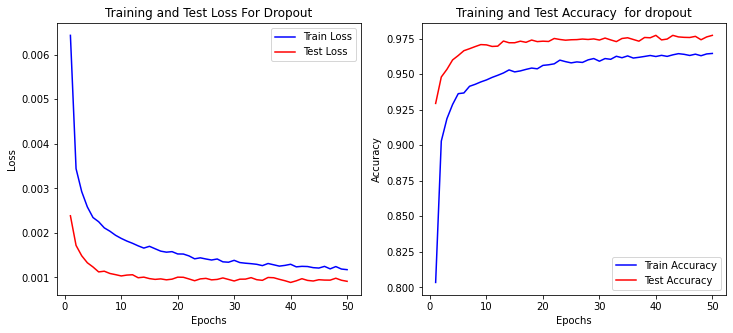

In [15]:
dp_train_losses = [loss.detach().numpy() for loss in dp_train_losses]
dp_test_losses = [loss.detach().numpy() for loss in dp_test_losses]

# Plotting
epochs = range(1, len(dp_train_losses) + 1)
plt.figure(figsize=(12, 5))# Plot training and test losses
plt.subplot(1, 2, 1)
plt.plot(epochs, dp_train_losses, 'b-', label='Train Loss')
plt.plot(epochs, dp_test_losses, 'r-', label='Test Loss')
plt.title('Training and Test Loss For Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plot training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, dp_train_accuracies, 'b-', label='Train Accuracy')
plt.plot(epochs, dp_test_accuracies, 'r-', label='Test Accuracy')
plt.title('Training and Test Accuracy  for dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Dropout + L2

In [18]:
dropout_model_2 = utils.deep_dropout_model(dropout_rate=0.5)
dpl2_trained_model, dpl2_train_losses, dpl2_train_accuracies, dpl2_test_losses, dpl2_test_accuracies = utils.train_model(dropout_model_2, lambda_l2=0.01)

Epoch 1/50 - Train loss: 0.0117, Train accuracy: 0.7881, Test loss: 0.0031, Test accuracy: 0.9069
Epoch 2/50 - Train loss: 0.0079, Train accuracy: 0.8754, Test loss: 0.0029, Test accuracy: 0.9107
Epoch 3/50 - Train loss: 0.0076, Train accuracy: 0.8807, Test loss: 0.0028, Test accuracy: 0.9147
Epoch 4/50 - Train loss: 0.0074, Train accuracy: 0.8868, Test loss: 0.0027, Test accuracy: 0.9199
Epoch 5/50 - Train loss: 0.0074, Train accuracy: 0.8881, Test loss: 0.0026, Test accuracy: 0.9259
Epoch 6/50 - Train loss: 0.0074, Train accuracy: 0.8894, Test loss: 0.0026, Test accuracy: 0.9235
Epoch 7/50 - Train loss: 0.0074, Train accuracy: 0.8897, Test loss: 0.0027, Test accuracy: 0.9185
Epoch 8/50 - Train loss: 0.0074, Train accuracy: 0.8892, Test loss: 0.0026, Test accuracy: 0.9209
Epoch 9/50 - Train loss: 0.0073, Train accuracy: 0.8915, Test loss: 0.0026, Test accuracy: 0.9218
Epoch 10/50 - Train loss: 0.0074, Train accuracy: 0.8907, Test loss: 0.0026, Test accuracy: 0.9193
Epoch 11/50 - Train

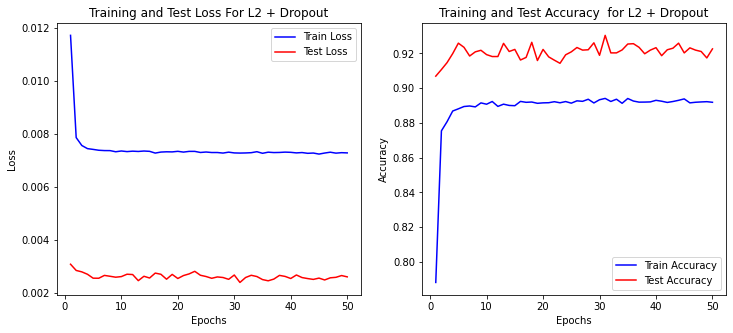

In [19]:
dpl2_train_losses = [loss.detach().numpy() for loss in dpl2_train_losses]
dpl2_test_losses = [loss.detach().numpy() for loss in dpl2_test_losses]

# Plotting
epochs = range(1, len(dpl2_train_losses) + 1)
plt.figure(figsize=(12, 5))# Plot training and test losses
plt.subplot(1, 2, 1)
plt.plot(epochs, dpl2_train_losses, 'b-', label='Train Loss')
plt.plot(epochs, dpl2_test_losses, 'r-', label='Test Loss')
plt.title('Training and Test Loss For L2 + Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plot training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, dpl2_train_accuracies, 'b-', label='Train Accuracy')
plt.plot(epochs, dpl2_test_accuracies, 'r-', label='Test Accuracy')
plt.title('Training and Test Accuracy  for L2 + Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results:

1. Loss and accuracies of Linear, Shallow and Deep Model

> Linear Model:Train loss: 0.0025, Train accuracy: 0.9297, Test loss: 0.0033, Test accuracy: 0.9106

> Shallow Model: Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0011, Test accuracy: 0.9748

> Deep Model: Train loss: 0.0000, Train accuracy: 1.0000, Test loss: 0.0008, Test accuracy: 0.9825

> 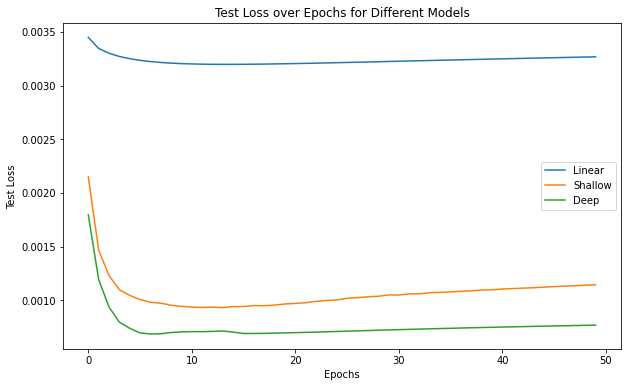

> 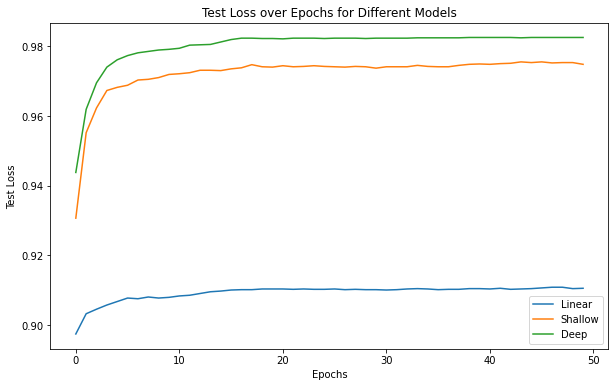


>  We pick Deep model because of best performance.

Its performance on test: 

> 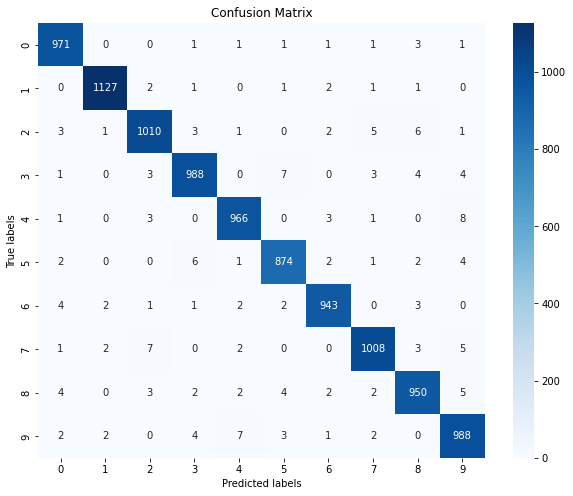

2. Deep Model with different values of lambda in L2 regularization:

> 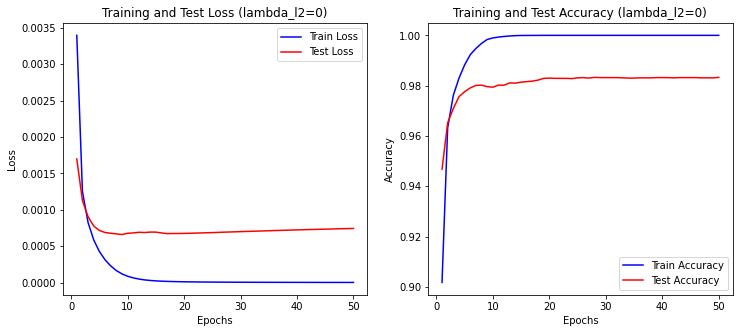

> 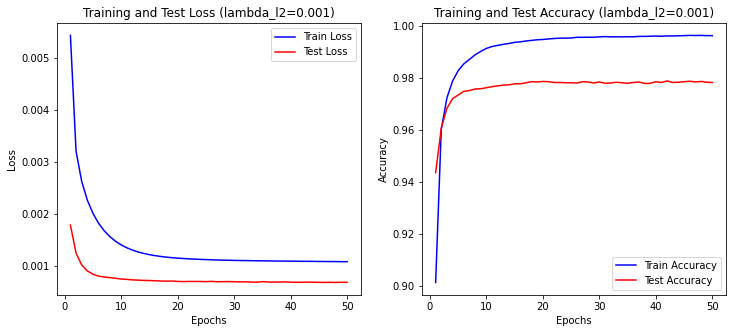

> 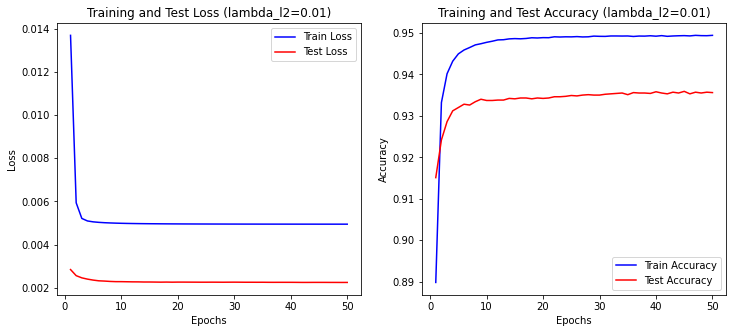

> 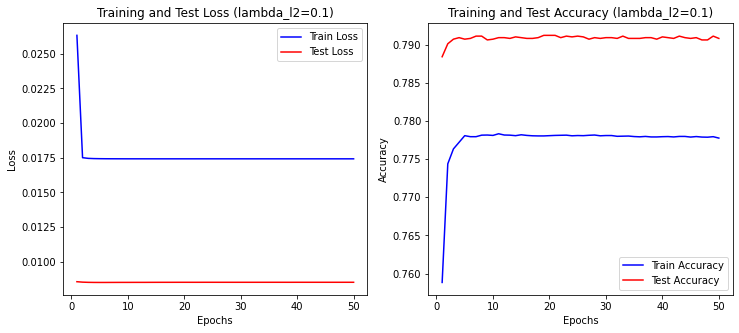

> 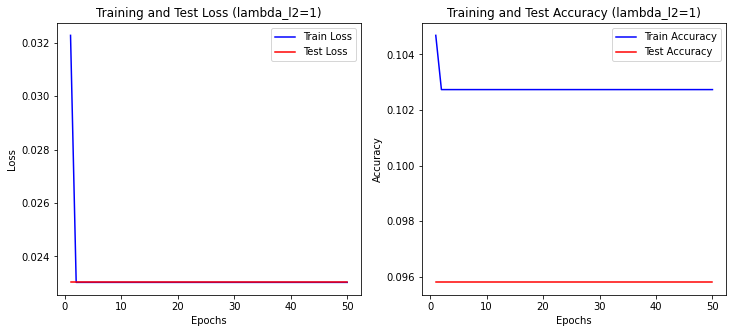

> We observe that in L2 regularization, it performs better on the test set. This is because regularization techniques can cause underfitting on the training data but improve generalization on unseen data. In the higher values (lambda =1) its get too big and have bad results.

3. Performance of Deep Model with dropout:

> Train loss: 0.0012, Train accuracy: 0.9640, Test loss: 0.0009, Test accuracy: 0.9768

> 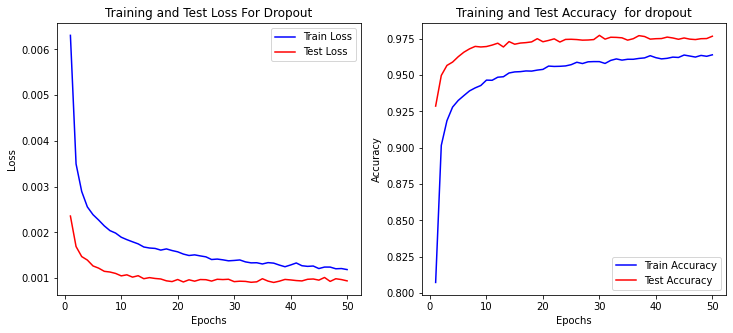

Dropout shows better results in terms of having better performance on test set, given it's a deep neural network where dropout is more effective.

4. Performance of L2 Regularisation with Dropout:

> Train loss: 0.0073, Train accuracy: 0.8929, Test loss: 0.0025, Test accuracy: 0.9227

> 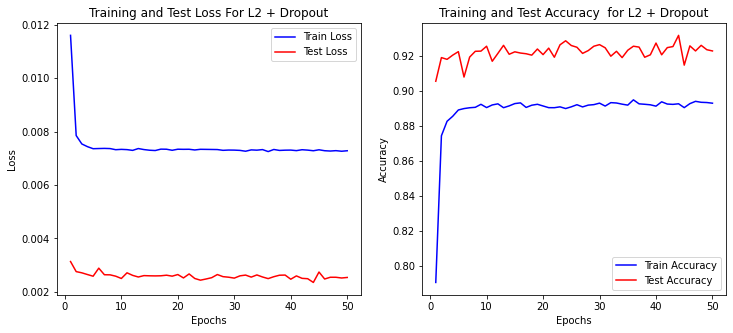

#### Conclusion:

Both of the refularization techniques showed that it performances better in the test data because of the generalization during the training.Given that MNIST is a simpler dataset, L2 regularization is seen to be effective in preventing overfitting, Dropout is particularly useful in deeper and more complex networks where overfitting is a more significant concern.